**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Notebook Title

Live Code 3

Nama: Gusti Ayu Dewi Puspa Kartikasari

Batch: 012

## Description

### Objective
Membantu validasi dugaan tim marketing apakah betul ada anomali pada data transaksi


### Problem Statement
Kamu adalah seorang data scientist di salah satu perusahaan penjual Liquor. Ada terdapat 5000 transaksi yang terjadi di satu hari untuk suatu produk. Tim marketing menduga ada suatu keanehan pada data transaksi. Bantu tim marketing untuk memvalidasi dugaan mereka apakah betul ada anomali pada data transaksi.

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

### Salin query yang telah dibuat di Google Cloud Platform, tulislah pada bagian atas notebook

select sale_dollars

from `bigquery-public-data.iowa_liquor_sales.sales` as liquor

LIMIT 5000;

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import statistics

: 

In [2]:
df = pd.read_csv(r'h8dsft_P0LC3_Gusti_Ayu_Dewi_Puspa_Kartikasari.csv')

### Tampilkan head dan tail dari dataset pada notebook!

In [3]:
df.head(5)

,sale_dollars
0,528.96
1,23.16
2,833.40
3,1057.32
4,7.26


In [4]:
df.tail(5)

,sale_dollars
4995,24.36
4996,309.60
4997,517.20
4998,13.24
4999,189.00


## Melakukan pengecekan anomali/outlier

1. Lakukan perhitungan central tendency (mean, median, modus) terhadap data sebelum dideteksi adanya anomali. [Menjawab Rubrik 1b]

In [5]:
print('total:', df.sale_dollars.sum())
print('mean:', df.sale_dollars.mean())
print('median:', df.sale_dollars.median())
print('modus:', statistics.mode(df.sale_dollars))

total: 3113853.79
mean: 622.7707579999994
median: 136.33499999999998
modus: 45.72


Note: Mean dan median berjauhan, dimana mean lebih besar dibanding median / tertarik kekanan sehingga ada kemungkinan bahwa data transaksi adalah right tailed / right skewed.

2. Cek skewness data untuk mengetahui apakah data terdistribusi normal atau tidak. [Menjawab Rubrik 1c]

In [6]:
print('skewness: ', str(df['sale_dollars'].skew()))
print('kurtosis: ', str(df['sale_dollars'].kurt()))

skewness:  10.115263815152225
kurtosis:  185.7619947240576


Note: skewness more than 1 signify that the data used is highly skewed, the direction of skew itself is determined of the negativity of skewness. The value of positive skewness signify that the tail will be on the right, then it can be visualized that the data are highly right skewed. Kurtosis indicate the sharpness/tailedness, high kutosis in here signify that the data are heavy tailed.

3. Lakukan pengolahan data dengan menggunakan extreme value analysis. [Menjawab Rubrik 1d]

Pengolahan data extreme value analysis (outliers) menggunakan tukey's rule: 

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

In [7]:
quantil_25 = df.sale_dollars.quantile(0.25)
quantil_75 = df.sale_dollars.quantile(0.75)
print(quantil_25,quantil_75)

44.08 607.32


In [8]:
IQR = quantil_75-quantil_25
IQR

563.24

In [9]:
upper = quantil_75 + 1.5 *IQR
lower = quantil_25 - 1.5 *IQR
print('upper limit of non outliers: ', upper, '; lower limit of non outliers: ', lower)

upper limit of non outliers:  1452.18 ; lower limit of non outliers:  -800.78


In [10]:
outliers = df[(df['sale_dollars'] < lower) |
 (df['sale_dollars'] > upper)]
print('total outliers:', outliers.sale_dollars.count(), '; outliers percentage: ', (outliers.sale_dollars.count()/df.sale_dollars.count())*100, '%')

total outliers: 513 ; outliers percentage:  10.26 %


The percentage of data's outliers are 10.23%, the quantity is not significant.

4. Buat variabel baru yang menyimpan data yang sudah dibuang data anomalinya.

In [11]:
df_withoutoutliers = df.copy()

for i in outliers.index:
   df_withoutoutliers.drop(index = i, inplace= True)


In [12]:
print('before: ')
print(df.info())
print('')
print('after :')
print(df_withoutoutliers.info())


before: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
sale_dollars    5000 non-null float64
dtypes: float64(1)
memory usage: 39.1 KB
None

after :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4487 entries, 0 to 4999
Data columns (total 1 columns):
sale_dollars    4487 non-null float64
dtypes: float64(1)
memory usage: 70.1 KB
None


Note: 513 outliers data already deleted. (the difference between 5000 and 4487 is 513, equal to 513 outliers detected above. )

5. Analisis signifikansi perbedaan data sebelum dibuang outliernya dengan sesudah menggunakan hipotesis testing single sample. (Anggap data awal merupakan data populasi dan data baru merupakan sample). Definisikan pula hipotesis null dan alternatifnya. [Menjawab Rubrik 1e]

NOTE: menggunakan hipotesis testing single sample (stated in the question)

H0 : mu_sample = mu_population

H1 : mu_sample != mu_population

In [13]:
np.round(df.sale_dollars.mean(),2)

622.77

where mu_population = 622.77

therefore:

H0 : mu_sample = 622.77

H1 : mu_sample <= 622.77

Calculate mean of data without outlier

In [14]:
np.round(df_withoutoutliers.sale_dollars.mean(),2)

270.49

Note: the difference between with outliers and without outliers is big.
Proceed to hypothesis testing to check whether it is significance or not.

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

t_stat,p_val = stats.ttest_1samp(df_withoutoutliers.sale_dollars, 622.77)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: -71.67870927934268


t- statistics = -71.7 is a negative, we can report it as an absolute value.

Note: Negative t-values: The sign of a t-value tells us the direction of the difference in sample means, which can be difficult to interpret without further explanation: Does a negative t-value indicate A's sample mean was greater than B's, or less? Therefore, it is common to report the t-value as the absolute value of the t-value given by the statistics program. (source: http://www.csic.cornell.edu/Elrod/t-test/reporting-t-test.html)

In [16]:
# t_stat = np.abs(t_stat)
# t_stat

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


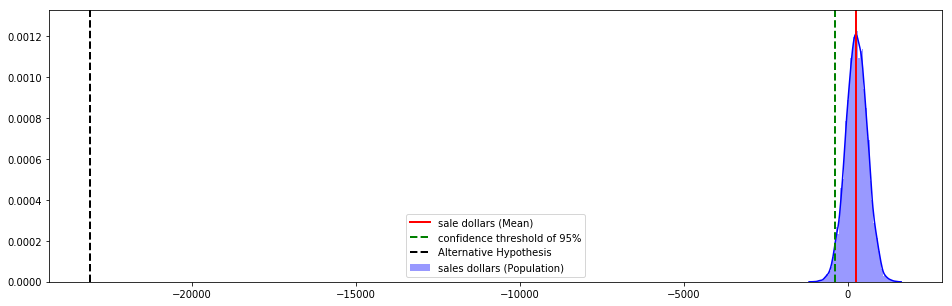

In [17]:
saledollars_pop = np.random.normal(df_withoutoutliers.sale_dollars.mean(), df_withoutoutliers.sale_dollars.std(), 10000)

ci = stats.norm.interval(0.95, df_withoutoutliers.sale_dollars.mean(), df_withoutoutliers.sale_dollars.std())

plt.figure(figsize=(16,5))
sns.distplot(saledollars_pop, label='sales dollars (Population)', color='blue')
plt.axvline(df_withoutoutliers.sale_dollars.mean(), color='red', linewidth=2, label='sale dollars (Mean)')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(saledollars_pop.mean() + t_stat*saledollars_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

CONCLUSION: Since our p-value = 0.0 is less than 0.05 (confidence level), so we reject the null hypothesis and we can conclude that, the mean of data with outliers removed are significantly different with original data.

## Conclusions, Assumptions, Overall Analysis

PERTANYAAN:
1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu![Menjawab Rubrik 2a]

rata-rata:622,77

median: 136.33

modus:45.72

Pemusatan data terdapat pada median yaitu nilai tengah namun dapat dilihat bahwa mean lebih besar dibanding median. Ini mengindikasikan bahwa mean tertarik kearah kanan (terdapat indikasi right-skewed). Sehingga persebaran datanya dapat divisualisasikan bahwa data berkumpul disekitar median (136.33) dan memanjang kearah kanan (right-tailed) yang diindikasikan oleh mean tertarik menjadi lebih besar dibanding median.


2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu![Menjawab Rubrik 2b]

skewness:  10.115263815152225
kurtosis:  185.7619947240576
 
Skewness more than 1 signify that the data used is highly skewed, the direction of skew itself is determined of the negativity of skewness. The value of positive skewness signify that the tail will be on the right, then it can be visualized that the data are highly right skewed. Kurtosis indicate the sharpness/tailedness, high kutosis in here signify that the data are heavy tailed.

3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data![Menjawab Rubrik 2c]

We use Tukey's rule for Outlier Detection because it can be used if the distribution is not normal where in question number 2 it is indicated that the data distribution is highly right skewed. Therefore, the suitable technique is Tukey's and z value score may not suitable (z score used if the distribution is normal).

4. Ada berapa banyak data yang merupakan outlier? apakah cukup signifikan jumlahnya? (anggap bahwa jumlah signifikan lebih dari 50%). Jelaskan jawabanmu![Menjawab Rubrik 2d]

The result of percentage of data's outliers are 10.23%, only 513 data out off 5000 data. Therefore, the quantity is not significant (<50%)

5. Setelah kamu menyingkirkan outlier dari data dan melakukan uji hipotesis, apakah ada perbedaan yang signifikan? jelaskan jawabanmu![Menjawab Rubrik 2e]

After the hypothesis testing it is concluded the null hypothesis is rejected, there is significance difference between data with outliers and data without outliers. The conclusion is also can be supported by calculate the mean of data without outliers is reduced to 270.49 from 622.77, the reduction is 57%.


## POIN ANALISIS

Apa kesimpulan yang akan kamu bagikan kepada tim marketing berkaitan dugaan mereka?

Betul terdapat keanehan pada data transaksi. Dimana terdapat 513 data anomali yang terdeteksi pada data transaksi, nilai ini memiliki nilai diatas 1452.18 (nilai rata-rata wajar). Ke-513 data anomali ini menyebabkan rata-rata penjualan terlihat meningkat secara signifikan. 
Apabila traceback akan dilakukan, disarankan untuk melakukan history traceback pada 513 data transaksi tersebut.

Note kesimpulan (bukan untuk marketing): data terkecil original data yaitu 2.94 dimana masih didalam lower limit outlier(-800.78). Dapat disimpulkan bahwa outliers semuanya berasal dari data diatas upper limit (diatas 1452.18).

In [18]:
df.sort_values(by='sale_dollars', ascending=False).tail(5)

,sale_dollars
3507,5.00
4685,3.50
4335,3.12
1339,2.94
2506,2.94
